In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import gym
from statistics import mean, median
from collections import Counter
from env import TicTacToe
import env


from room import Game_Handler
from network import Network
from agents import DQNAgent, HumanAgent

In [2]:
game_handler = Game_Handler()

In [3]:
agentX = DQNAgent(explore=False)
agentO = DQNAgent(explore=False)


it is O's turn


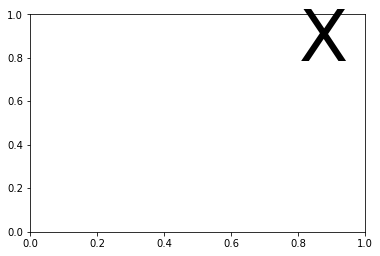

it is X's turn


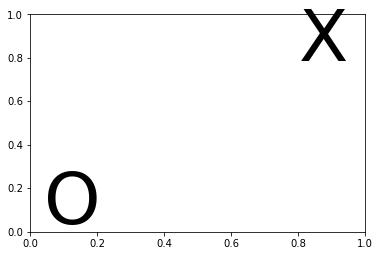

it is O's turn


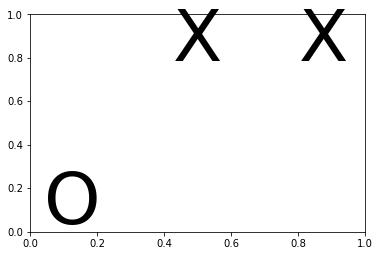

it is X's turn


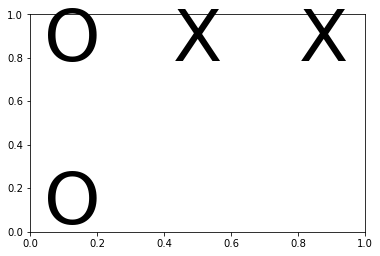

it is O's turn


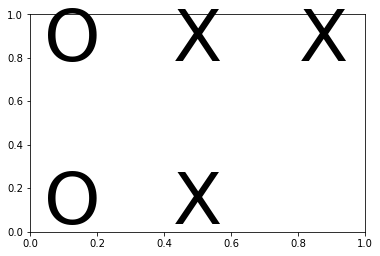

it is X's turn


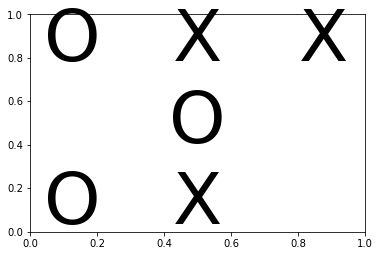

it is O's turn


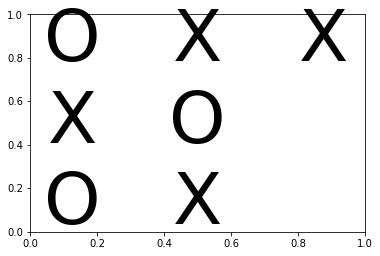

it is X's turn


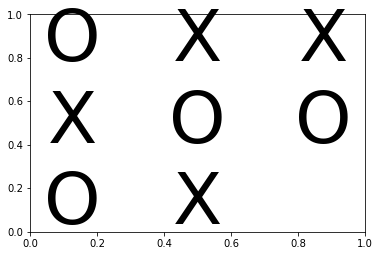

game over 0 wins
it is O's turn


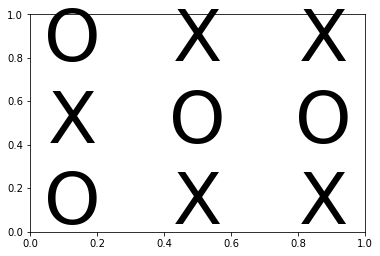

In [4]:
game_handler.play_game(do_render=True, players={1: agentX, -1: agentO})

In [59]:
board = np.random.randint(-1, 2, size=9).reshape(3,3)

In [60]:
board

array([[-1,  1, -1],
       [ 0, -1,  0],
       [ 0,  1,  0]])

In [4]:
states = [(1,2), (3,4)]

In [5]:
[board + player for board, player in states]

[3, 7]